# Statistics and Visualisations

In [1]:
NAME = "Knudsen"
#NAME = "Niedermayer"

In [2]:

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# unpickle the abnormal returns
df_abnormal_returns = pd.read_pickle(f"data/{NAME}/df_abnormal_returns.pkl")



# set plotting sizes
tick_size = 15
label_size = 20
title_size = 30
fig_height = 20

EVENT_INDEX = 20 # because 20 [0,..19] are before the event


investigation_periods = {
    "overall": (pd.Timestamp("2018-01-01"), pd.Timestamp("2021-12-31")),
    "pre-pandemic": (pd.Timestamp("2018-01-01"), pd.Timestamp("2020-02-29")),
    "pandemic": (pd.Timestamp("2020-03-01"), pd.Timestamp("2021-12-31")),
}

with open(f"data/{NAME}/companies.pkl", "rb") as f:
    companies = pickle.load(f)


C:\Users\waxfa\.conda\envs\intDisp\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Having a look at all trade types together

In [3]:
types_of_interest = ["P - Purchase", "S - Sale", "S - Sale+OE"]
df_abnormal_returns.loc[:,:,types_of_interest,:]

0         1         2   \
Company i   TradeType    event_timestamp                                 
ACGL    23  P - Purchase 2021-11-12      -0.011237 -0.008574 -0.011561   
        78  P - Purchase 2020-05-20      -0.046837 -0.021745 -0.042353   
        81  P - Purchase 2020-05-15       0.011601  0.000333 -0.005330   
        94  P - Purchase 2020-05-08       0.073148 -0.060993 -0.046641   
        179 P - Purchase 2018-11-29       0.017040  0.003109 -0.018433   
...                                            ...       ...       ...   
ESTA    10  S - Sale+OE  2021-08-09      -0.043853 -0.001680 -0.067295   
        12  S - Sale+OE  2021-06-11      -0.005784  0.025749 -0.011808   
        15  S - Sale+OE  2021-05-21       0.010573 -0.011018  0.010731   
        19  S - Sale+OE  2021-05-20       0.007037  0.010460 -0.011093   
GTEC    14  S - Sale+OE  2019-11-08      -0.014461 -0.096362 -0.055544   

                                                3         4         5   \
Company i   TradeType    event_timestamp                                 
ACGL    23  P - Purchase 2021-11-12       0.013640  0.001997  0.012204   
        78  P - Purchase 2020-05-20       0.032686  0.025542 -0.007387   
        81  P - Purchase 2020-05-15      -0.046623 -0.021645 -0.042186   
        94  P - Purchase 2020-05-08      -0.044189 -0.050032  0.009853   
        179 P - Purchase 2018-11-29      -0.005547 -0.001299 -0.002184   
...                                            ...       ...       ...   
ESTA    10  S - Sale+OE  2021-08-09       0.031456 -0.013298 -0.016498   
        12  S - Sale+OE  2021-06-11       0.043351  0.020864 -0.020792   
        15  S - Sale+OE  2021-05-21      -0.057160  0.009252 -0.016823   
        19  S - Sale+OE  2021-05-20       0.010737 -0.057158  0.009220   
GTEC    14  S - Sale+OE  2019-11-08      -0.134607 -0.073147  0.479799   

                                                6         7         8   \
Company i   TradeType    event_timestamp                                 
ACGL    23  P - Purchase 2021-11-12      -0.003195 -0.005008 -0.019241   
        78  P - Purchase 2020-05-20      -0.053184  0.005794  0.018287   
        81  P - Purchase 2020-05-15       0.032831  0.025586 -0.007143   
        94  P - Purchase 2020-05-08      -0.000962 -0.006165 -0.048641   
        179 P - Purchase 2018-11-29       0.008996  0.007363  0.000558   
...                                            ...       ...       ...   
ESTA    10  S - Sale+OE  2021-08-09      -0.017082  0.030108 -0.011624   
        12  S - Sale+OE  2021-06-11       0.004179  0.008488  0.005585   
        15  S - Sale+OE  2021-05-21      -0.051353  0.004831  0.018770   
        19  S - Sale+OE  2021-05-20      -0.016783 -0.051337  0.004940   
GTEC    14  S - Sale+OE  2019-11-08       0.001712 -0.211728  0.004824   

                                                9   ...        31        32  \
Company i   TradeType    event_timestamp            ...                       
ACGL    23  P - Purchase 2021-11-12      -0.016283  ... -0.022326  0.020497   
        78  P - Purchase 2020-05-20      -0.012839  ...  0.044768  0.008856   
        81  P - Purchase 2020-05-15      -0.053095  ...  0.040572  0.059108   
        94  P - Purchase 2020-05-08      -0.023132  ...  0.038687  0.010874   
        179 P - Purchase 2018-11-29       0.004839  ... -0.006537  0.012192   
...                                            ...  ...       ...       ...   
ESTA    10  S - Sale+OE  2021-08-09      -0.004272  ... -0.029820 -0.008953   
        12  S - Sale+OE  2021-06-11      -0.029965  ... -0.019196  0.014319   
        15  S - Sale+OE  2021-05-21      -0.043795  ...  0.027545 -0.027151   
        19  S - Sale+OE  2021-05-20       0.018778  ... -0.008649  0.027507   
GTEC    14  S - Sale+OE  2019-11-08       0.097381  ...  0.002034 -0.050608   

                                                33        34        35  \
Company i   TradeType    event_timestamp                 

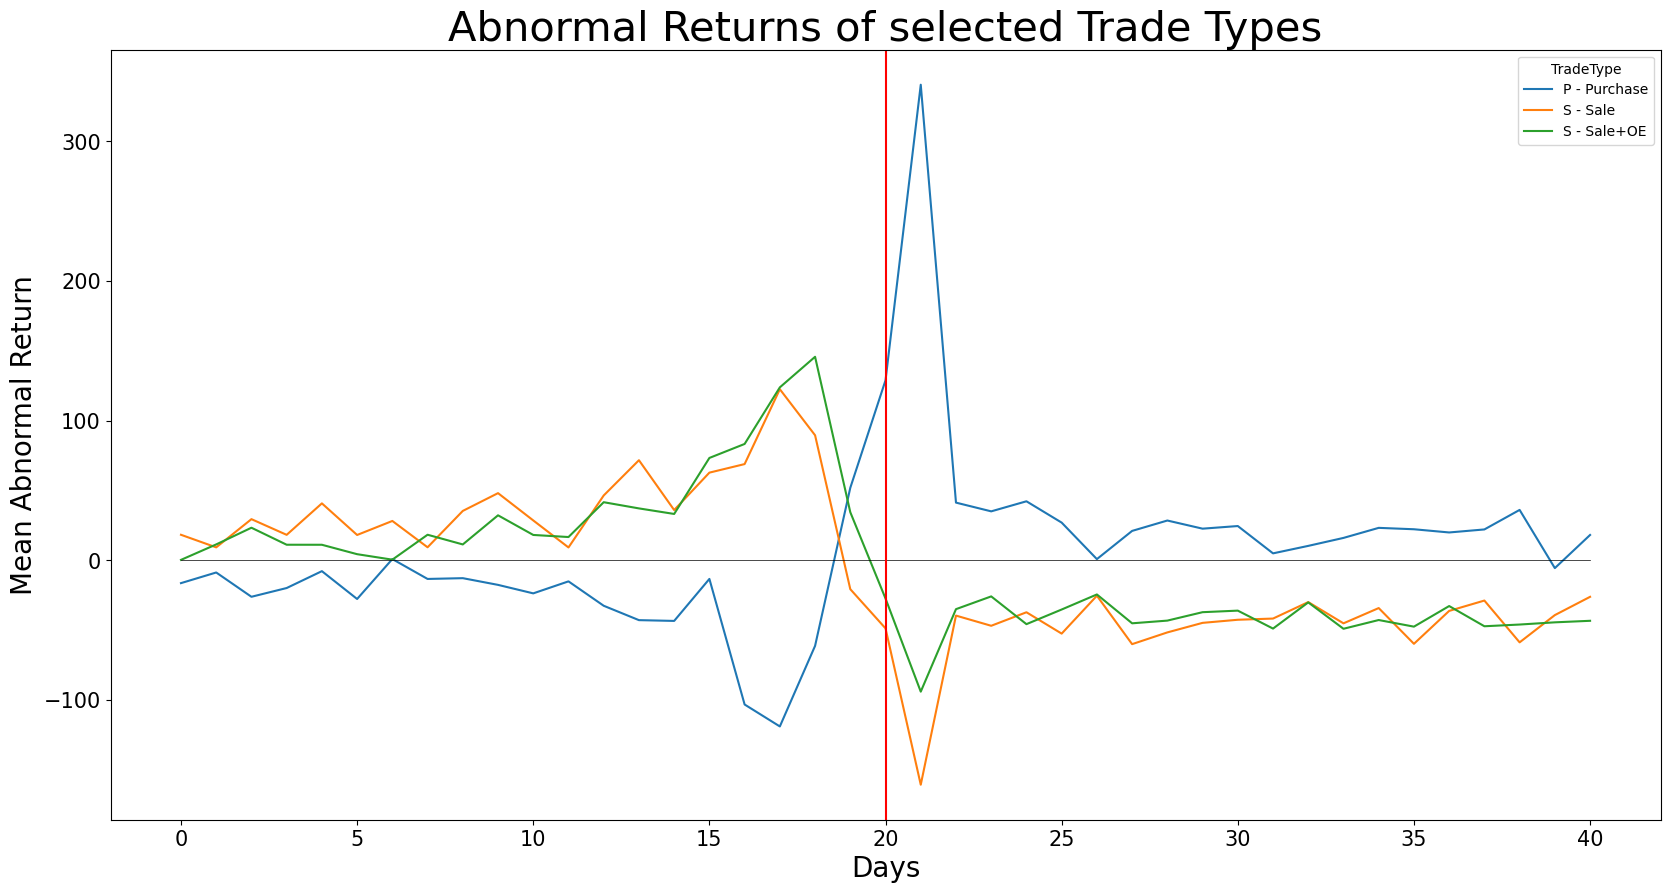

In [4]:

a = df_abnormal_returns.loc[:,:,types_of_interest,:].groupby(level=[2]).sum().transpose().plot(figsize=(fig_height, 10))
plt.plot(np.zeros(len(df_abnormal_returns.columns)), color="black", linewidth=0.5)
a.set_title("Abnormal Returns of selected Trade Types",fontsize=title_size)
a.set_xlabel("Days", fontsize=label_size)
a.set_ylabel("Mean Abnormal Return", fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.axvline(x = EVENT_INDEX, color = 'red', label = 'DD Event time', linewidth = 1.5)
plt.savefig(f"data/{NAME}/visualisations/AR_selected_tradetypes.png", dpi=600, bbox_inches='tight')

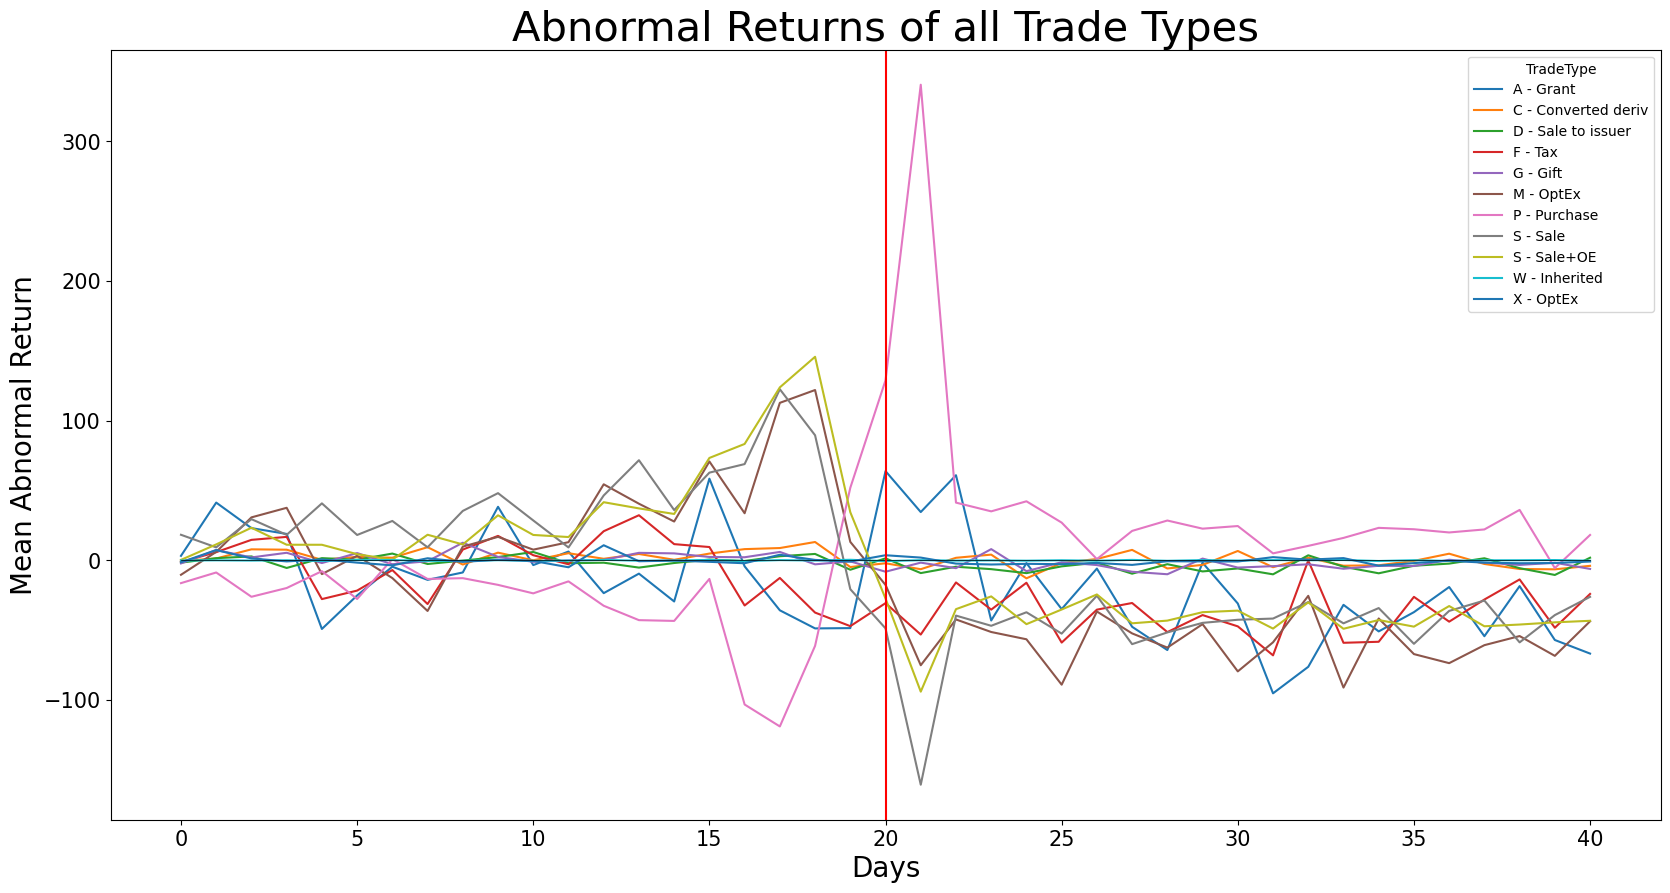

In [5]:
a = df_abnormal_returns.groupby(level=[2]).sum().transpose().plot(figsize=(fig_height, 10), fontsize=15)
plt.plot(np.zeros(len(df_abnormal_returns.columns)), color="black", linewidth=0.5)
a.set_title("Abnormal Returns of all Trade Types",fontsize=title_size)
a.set_xlabel("Days", fontsize=label_size)
a.set_ylabel("Mean Abnormal Return", fontsize=label_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.axvline(x = EVENT_INDEX, color = 'red', label = 'DD Event time', linewidth = 1.5)
plt.savefig(f"data/{NAME}/visualisations/AR_all_tradetypes.png", dpi=600, bbox_inches='tight')

In [6]:
df_abnormal_returns

0         1         2   \
Company i  TradeType           event_timestamp                                 
IMTE    2  A - Grant           2020-10-20       0.015693 -0.048428  0.044395   
        3  M - OptEx           2020-10-20       0.015693 -0.048428  0.044395   
ACGL    14 F - Tax             2021-11-18       0.002250  0.012087 -0.002870   
        15 M - OptEx           2021-11-18       0.002250  0.012087 -0.002870   
        16 S - Sale+OE         2021-11-18       0.002250  0.012087 -0.002870   
...                                                  ...       ...       ...   
NESR    1  P - Purchase        2018-06-08      -0.000215  0.000433 -0.002691   
        2  A - Grant           2018-06-08      -0.000215  0.000433 -0.002691   
        3  C - Converted deriv 2018-06-08      -0.000215  0.000433 -0.002691   
        4  P - Purchase        2018-05-15       0.001948  0.003880 -0.005122   
SJ      0  C - Converted deriv 2020-05-11       0.000677 -0.000736 -0.000012   

                                                      3         4         5   \
Company i  TradeType           event_timestamp                                 
IMTE    2  A - Grant           2020-10-20      -0.025923 -0.037550 -0.035355   
        3  M - OptEx           2020-10-20      -0.025923 -0.037550 -0.035355   
ACGL    14 F - Tax             2021-11-18      -0.004898 -0.019147 -0.015832   
        15 M - OptEx           2021-11-18      -0.004898 -0.019147 -0.015832   
        16 S - Sale+OE         2021-11-18      -0.004898 -0.019147 -0.015832   
...                                                  ...       ...       ...   
NESR    1  P - Purchase        2018-06-08      -0.000063  0.000848  0.005834   
        2  A - Grant           2018-06-08      -0.000063  0.000848  0.005834   
        3  C - Converted deriv 2018-06-08      -0.000063  0.000848  0.005834   
        4  P - Purchase        2018-05-15       0.001847 -0.002094 -0.001104   
SJ      0  C - Converted deriv 2020-05-11      -0.001374 -0.000391  0.005709   

                                                      6         7         8   \
Company i  TradeType           event_timestamp                                 
IMTE    2  A - Grant           2020-10-20       0.030909 -0.027829  0.031959   
        3  M - OptEx           2020-10-20       0.030909 -0.027829  0.031959   
ACGL    14 F - Tax             2021-11-18      -0.007438  0.013804  0.011532   
        15 M - OptEx           2021-11-18      -0.007438  0.013804  0.011532   
        16 S - Sale+OE         2021-11-18      -0.007438  0.013804  0.011532   
...                                                  ...       ...       ...   
NESR    1  P - Purchase        2018-06-08      -0.000101  0.002727 -0.007979   
        2  A - Grant           2018-06-08      -0.000101  0.002727 -0.007979   
        3  C - Converted deriv 2018-06-08      -0.000101  0.002727 -0.007979   
        4  P - Purchase        2018-05-15       0.000846 -0.000047  0.004920   
SJ      0  C - Converted deriv 2020-05-11      -0.005951  0.000743 -0.000772   

                                                      9   ...        31  \
Company i  TradeType           event_timestamp            ...             
IMTE    2  A - Grant           2020-10-20      -0.010526  ... -0.017747   
        3  M - OptEx           2020-10-20      -0.010526  ... -0.017747   
ACGL    14 F - Tax             2021-11-18      -0.004619  ...  0.015053   
        15 M - OptEx           2021-11-18      -0.004619  ...  0.015053   
        16 S - Sale+OE         2021-11-18      -0.004619  ...  0.015053   
...                                                  ...  ...       ...   
NESR    1  P - Purchase        2018-06-08      -0.003118  ... -0.000935   
        2  A - Grant           2018-06-08      -0.003118  ... -0.000935   
        3  C - Converted deriv 2018-06-08      -0.003118  ... -0.000935   
        4  P - Purchase        2018-05-15      -0.003141  ... -0.000109   
SJ      0  C - Converted deriv 

I think OE and OptEx means option exercise. "to exercise" means to put into effect the right to buy or sell the underlying security that is specified in the options contract." Can we be sure that the action does not shift the market, and the swing in return is really due to new information? Are these trades public, so maybe they are used as a signal for traders?

### Boxplot of the sum over all companies's AR

![alt text](assets/images/time_agg.png)

In our case it is not company i, but filing i

Types of trade to pick from:

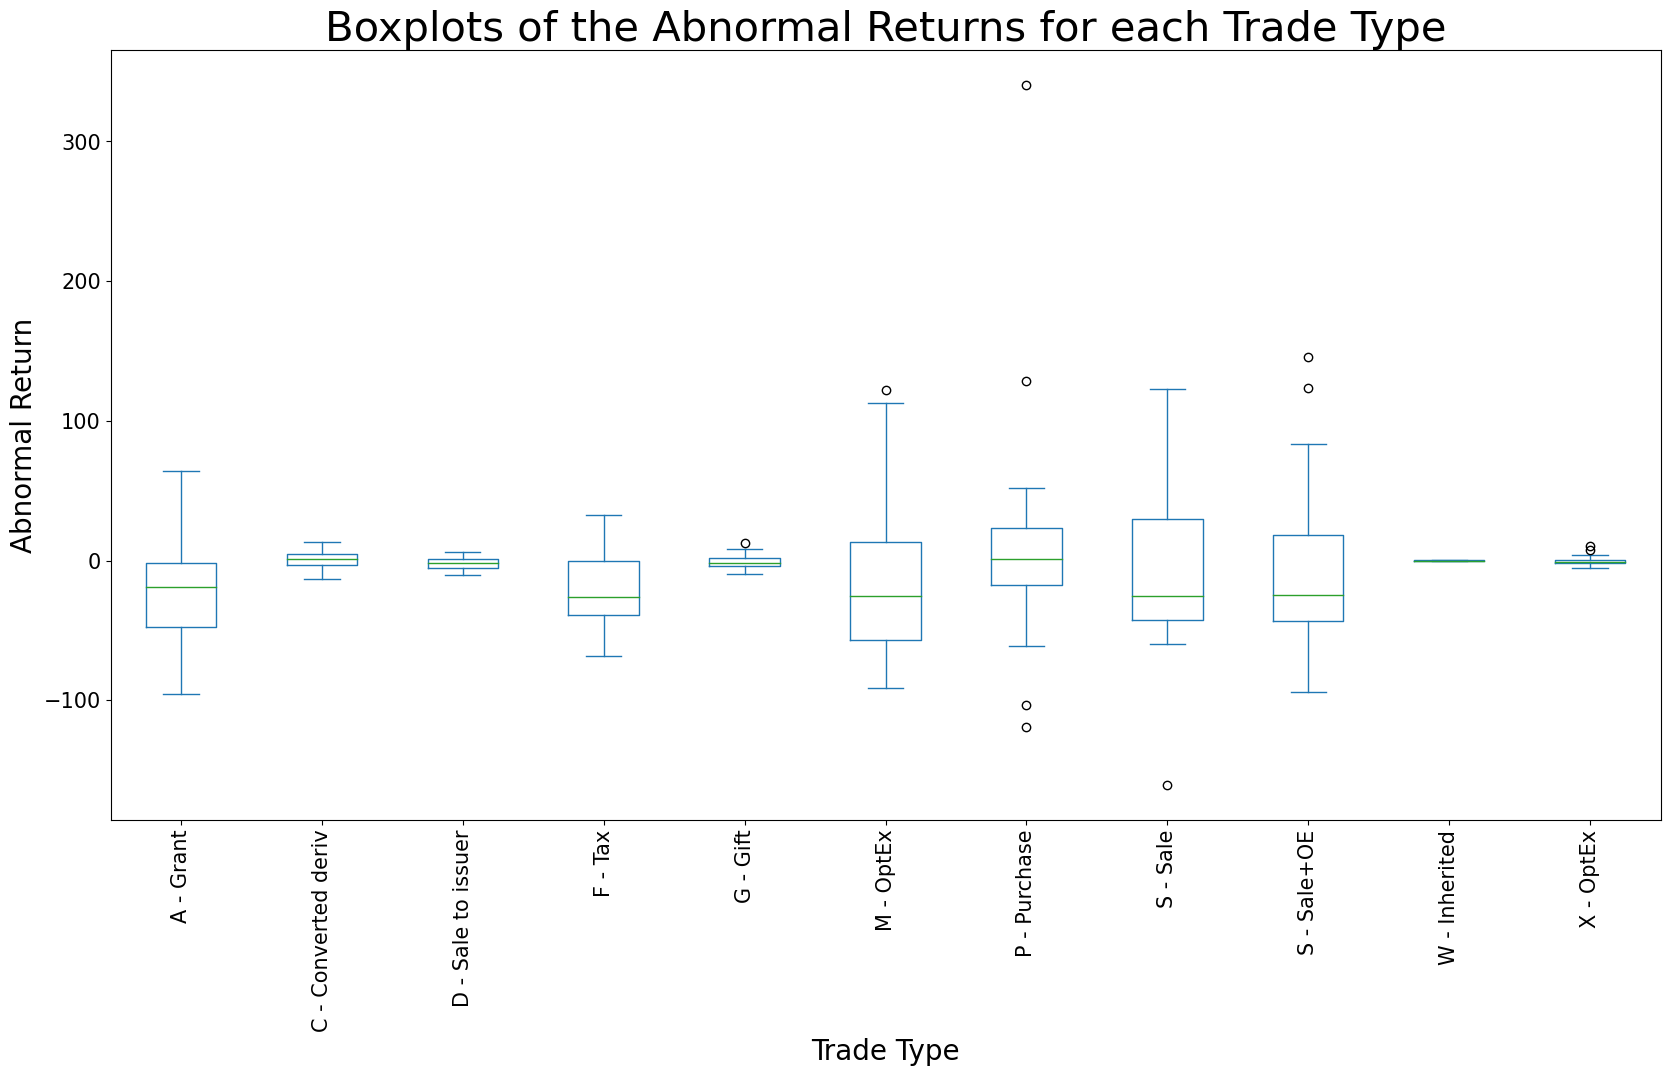

In [7]:
ax = df_abnormal_returns.groupby(level=[2]).sum().transpose().plot.box(rot=90, figsize=(fig_height, 10))
ax.set_title("Boxplots of the Abnormal Returns for each Trade Type",fontsize=title_size)
ax.set_xlabel("Trade Type", fontsize=label_size)
ax.set_ylabel("Abnormal Return", fontsize=label_size)

plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

plt.savefig(f"data/{NAME}/visualisations/AR_all_tradetypes_boxplot.png", dpi=600, bbox_inches='tight')

In [8]:
types = list(set([x[2] for x in df_abnormal_returns.index]))
types

['G - Gift',
 'F - Tax',
 'S - Sale+OE',
 'P - Purchase',
 'X - OptEx',
 'S - Sale',
 'W - Inherited',
 'A - Grant',
 'D - Sale to issuer',
 'M - OptEx',
 'C - Converted deriv']

Specify the type of the trades to investigate

In [9]:
type_ = "P - Purchase" # "S - Sale"
df_abnormal_returns_type = df_abnormal_returns.loc[:,:,type_]

The index describes the company and the index of the filing in the compnay, the columns represent the days in the event window

In [10]:
df_abnormal_returns_type

0         1         2         3         4   \
Company i   event_timestamp                                                     
ACGL    23  2021-11-12      -0.011237 -0.008574 -0.011561  0.013640  0.001997   
        78  2020-05-20      -0.046837 -0.021745 -0.042353  0.032686  0.025542   
        81  2020-05-15       0.011601  0.000333 -0.005330 -0.046623 -0.021645   
        94  2020-05-08       0.073148 -0.060993 -0.046641 -0.044189 -0.050032   
        179 2018-11-29       0.017040  0.003109 -0.018433 -0.005547 -0.001299   
...                               ...       ...       ...       ...       ...   
HIHO    8   2019-05-17       0.001392  0.014567 -0.040831  0.005745  0.003541   
        9   2019-05-14      -0.038622  0.013967 -0.005238  0.001271  0.014433   
NESR    0   2018-06-08      -0.000215  0.000433 -0.002691 -0.000063  0.000848   
        1   2018-06-08      -0.000215  0.000433 -0.002691 -0.000063  0.000848   
        4   2018-05-15       0.001948  0.003880 -0.005122  0.001847 -0.002094   

                                   5         6         7         8         9   \
Company i   event_timestamp                                                     
ACGL    23  2021-11-12       0.012204 -0.003195 -0.005008 -0.019241 -0.016283   
        78  2020-05-20      -0.007387 -0.053184  0.005794  0.018287 -0.012839   
        81  2020-05-15      -0.042186  0.032831  0.025586 -0.007143 -0.053095   
        94  2020-05-08       0.009853 -0.000962 -0.006165 -0.048641 -0.023132   
        179 2018-11-29      -0.002184  0.008996  0.007363  0.000558  0.004839   
...                               ...       ...       ...       ...       ...   
HIHO    8   2019-05-17       0.001928  0.001671 -0.003328 -0.007880 -0.000589   
        9   2019-05-14      -0.041043  0.005643  0.003408  0.001786  0.001539   
NESR    0   2018-06-08       0.005834 -0.000101  0.002727 -0.007979 -0.003118   
        1   2018-06-08       0.005834 -0.000101  0.002727 -0.007979 -0.003118   
        4   2018-05-15      -0.001104  0.000846 -0.000047  0.004920 -0.003141   

                             ...        31        32        33        34  \
Company i   event_timestamp  ...                                           
ACGL    23  2021-11-12       ... -0.022326  0.020497  0.032558  0.011523   
        78  2020-05-20       ...  0.044768  0.008856 -0.035420 -0.048748   
        81  2020-05-15       ...  0.040572  0.059108  0.026241  0.044951   
        94  2020-05-08       ...  0.038687  0.010874 -0.021076 -0.042151   
        179 2018-11-29       ... -0.006537  0.012192 -0.004442 -0.012006   
...                          ...       ...       ...       ...       ...   
HIHO    8   2019-05-17       ... -0.021637 -0.004624  0.002246  0.036170   
        9   2019-05-14       ...  0.026396 -0.021861  0.037870 -0.021943   
NESR    0   2018-06-08       ... -0.000935 -0.009609 -0.011431  0.013288   
        1   2018-06-08       ... -0.000935 -0.009609 -0.011431  0.013288   
        4   2018-05-15       ... -0.000109  0.000976 -0.009960 -0.008938   

                                   35        36        37        38        39  \
Company i   event_timestamp                                                     
ACGL    23  2021-11-12       0.014721 -0.015167 -0.003748  0.012887 -0.005969   
        78  2020-05-20      -0.007916  0.001389 -0.003642 -0.008689 -0.014328   
        81  2020-05-15       0.009002 -0.035307 -0.048621 -0.008027  0.001530   
        94  2020-05-08       0.025338  0.038972  0.057473  0.024883  0.043074   
        179 2018-11-29       0.000009 -0.019412  0.018335  0.022009 -0.006167   
...                               ...       ...       ...       ...       ...   
HIHO    8   2019-05-17      -0.062412  0.005095 -0.017736  0.006058  0.026647   
        9   2019-05-14      -0.004788  0.002090  0.035934 -0.062604  0.004977   
NESR    0   2018-06-08      -0.014453  0.011374 -0.004327  0.015638 -0.000256   
        1   2018-06-08      -0.014453  0.011374

<AxesSubplot:>

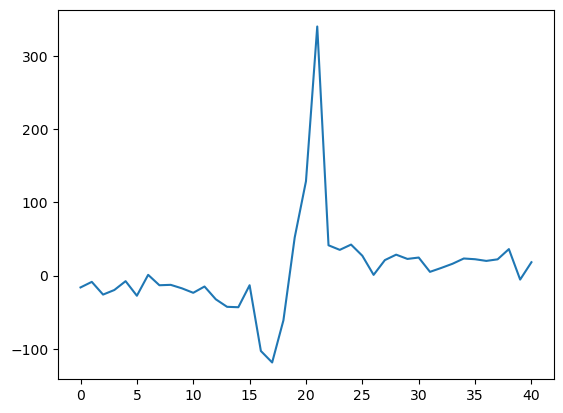

In [11]:
CAR = df_abnormal_returns_type.sum(axis=0)
CAR.plot()

![alt text](assets/images/cross_sectional_agg.png)


<AxesSubplot:>

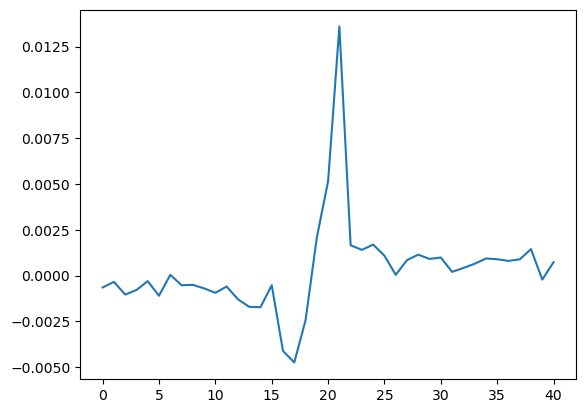

In [12]:
AR_bar = df_abnormal_returns_type.mean(axis=0) 
AR_bar.plot()

In [13]:
CAR_bar = AR_bar.sum()
CAR_bar

0.013261925298481428

In [14]:
# TODO var_CAR_bar = Does the definition make sense? It seems like we take the var of a scalar

![alt text](assets/images/cross_sectional_agg2.png)


In [15]:
CAR_bar_2 = CAR.mean()
CAR_bar_2

8.094882962111477

In [16]:
# var car TODO not sure what just sigma means.

## Statistics

Check if CAR mean = 0 (t-test)

In [17]:

tt = stats.ttest_1samp(CAR, popmean=0)
tt

Ttest_1sampResult(statistic=0.7695811876750905, pvalue=0.4460694004506216)

Check if CAR median = 0 (wilcoxon signed rank test)

In [18]:
stats.wilcoxon(CAR)

WilcoxonResult(statistic=383.0, pvalue=0.5382100163430399)

In [19]:
types = types
investigation_periods = investigation_periods
multiind_p, data_p = [], []

event_day_ranges = {
    "before": (0,20), # TODO for now we drop the filing day itself
    "after": (21,41)
}

aggregation_type = {"name": "cross-sectional", "axis":0}
#aggregation_type = {"name": "through time", "axis":1}

for type_ in types:
    for per in investigation_periods.keys():
        for side in event_day_ranges.keys():
                
            event_day_range = event_day_ranges[side]
            df_abnormal_returns_type = df_abnormal_returns.loc[:,:,type_]
            per_left, per_right = investigation_periods[per]


            timestamps = df_abnormal_returns_type.index.get_level_values(2)
            mask = (timestamps >= per_left) & (timestamps <= per_right)
            df_AR_type_per = df_abnormal_returns_type[mask]
            if not len(df_AR_type_per):
                print(f"skipping iteration because of 0 datapoints {(type_, per, side)}")
                continue
            df_AR_type_per_side = df_AR_type_per.iloc[:,event_day_range[0]:event_day_range[1]]
            CAR = df_AR_type_per_side.mean(axis=aggregation_type["axis"])

            pvalue_ttest = round(stats.ttest_1samp(CAR, popmean=0).pvalue, 10)
            pvalue_wilcoxon = round(stats.wilcoxon(CAR).pvalue, 10)
            mean = CAR.mean()
            median = CAR.median()
            # calculate a 95% confidence interval
            left, right = stats.t.interval(0.95, len(CAR)-1, loc=np.mean(CAR), scale=stats.sem(CAR))
            left, right = round(left, 4), round(right, 4)
            CI = left, right
            
            multiind_p.append((type_, per, side))
            data_p.append((mean, pvalue_ttest, median, pvalue_wilcoxon, len(df_AR_type_per), CI))

In [20]:
# process abnormal returns
df_p = pd.DataFrame.from_records(data_p)
df_p.index = pd.MultiIndex.from_tuples(multiind_p, names=["TradeType", "Period", "Side"])
df_p.columns = ["mean", "ttest pvalue", "median", "wilcoxon pvalue", "sample_size", "95% CI"]
df_p.to_csv(f"data/{NAME}/{aggregation_type['name']}_tests_result.csv")
df_p.sort_values("ttest pvalue")

mean  ttest pvalue    median  \
TradeType          Period       Side                                       
S - Sale+OE        overall      after  -0.001271  0.000000e+00 -0.001288   
M - OptEx          overall      after  -0.001004  0.000000e+00 -0.000984   
S - Sale+OE        pandemic     after  -0.001544  1.000000e-10 -0.001383   
M - OptEx          pre-pandemic after  -0.000905  1.000000e-09 -0.000766   
                   pandemic     after  -0.001107  2.700000e-09 -0.001045   
...                                          ...           ...       ...   
W - Inherited      pre-pandemic after   0.000090  9.236681e-01 -0.000514   
D - Sale to issuer overall      before  0.000015  9.505585e-01  0.000055   
W - Inherited      overall      before -0.000029  9.729596e-01 -0.000841   
                   pre-pandemic before -0.000025  9.732595e-01  0.000579   
                   pandemic     before -0.000033  9.795532e-01  0.000662   

                                        wilcoxon pvalue  sample_size  \
TradeType          Period       Side                                   
S - Sale+OE        overall      after          0.000002        33494   
M - OptEx          overall      after          0.000002        58489   
S - Sale+OE        pandemic     after          0.000002        17324   
M - OptEx          pre-pandemic after          0.000002        29804   
                   pandemic     after          0.000002        28685   
...                                                 ...          ...   
W - Inherited      pre-pandemic after          0.985435           40   
D - Sale to issuer overall      before         0.869488         3230   
W - Inherited      overall      before         0.985435           72   
                   pre-pandemic before         0.956329           40   
                   pandemic     before         0.756166           32   

                                                    95% CI  
TradeType          Period       Side                        
S - Sale+OE        overall      after   (-0.0015, -0.0011)  
M - OptEx          overall      after   (-0.0011, -0.0009)  
S - Sale+OE        pandemic     after   (-0.0018, -0.0013)  
M - OptEx          pre-pandemic after   (-0.0011, -0.0007)  
                   pandemic     after   (-0.0013, -0.0009)  
...                                                    ...  
W - Inherited      pre-pandemic after     (-0.0019, 0.002)  
D - Sale to issuer overall      before   (-0.0005, 0.0005)  
W - Inherited      overall      before   (-0.0018, 0.0017)  
                   pre-pandemic before   (-0.0016, 0.0015)  
                   pandemic     before   (-0.0027, 0.0026)  

[66 rows x 6 columns]

In [21]:
df_p.loc["S - Sale"]

mean  ttest pvalue    median  wilcoxon pvalue  \
Period       Side                                                        
overall      before  0.000786  3.958680e-05  0.000662         0.000036   
             after  -0.000978  4.220000e-07 -0.000857         0.000002   
pre-pandemic before  0.000812  2.000700e-06  0.000639         0.000004   
             after  -0.000719  1.046200e-06 -0.000734         0.000002   
pandemic     before  0.000764  1.075810e-03  0.000658         0.000708   
             after  -0.001206  1.455800e-06 -0.001077         0.000002   

                     sample_size              95% CI  
Period       Side                                     
overall      before        49067    (0.0005, 0.0011)  
             after         49067  (-0.0012, -0.0007)  
pre-pandemic before        23033    (0.0006, 0.0011)  
             after         23033  (-0.0009, -0.0005)  
pandemic     before        26034    (0.0003, 0.0012)  
             after         26034  (-0.0016, -0.0008)

#### Export information to latex

In [22]:
counter = 0
for t in types:
    counter = counter+1
    #print(t)
    df_ = df_p.loc[t,:,:]
    df_ = df_.rename(columns={'Side of the event': 'Side'
                              , 'mean': 'mean'
                              , 'ttest pvalue': 'ttest'
                              , 'median': 'median'
                              , 'wilcoxon pvalue': 'Wilcoxon'
                              , 'sample_size': 'N'})
    #display(df_)
    
    latex = df_.drop(columns=["95% CI"])\
    .to_latex( column_format="llrrrrr"
              , position="H"
              , label=f"table:t{counter}_hypothesistest"
              , caption= f"Hypothesis tests for type: {t}"
              #, index = False
    )
    print(latex)

\begin{table}[H]
\centering
\caption{Hypothesis tests for type: G - Gift}
\label{table:t1_hypothesistest}
\begin{tabular}{llrrrrr}
\toprule
         &       &      mean &     ttest &    median &  Wilcoxon &     N \\
Period & Side &           &           &           &           &       \\
\midrule
overall & before &  0.000453 &  0.020912 &  0.000440 &  0.044054 &  5016 \\
         & after & -0.000655 &  0.001297 & -0.000712 &  0.001017 &  5016 \\
pre-pandemic & before &  0.000262 &  0.089218 &  0.000136 &  0.153646 &  2504 \\
         & after & -0.000864 &  0.000744 & -0.000824 &  0.000851 &  2504 \\
pandemic & before &  0.000644 &  0.047035 &  0.000636 &  0.053169 &  2512 \\
         & after & -0.000447 &  0.023362 & -0.000360 &  0.029575 &  2512 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}[H]
\centering
\caption{Hypothesis tests for type: F - Tax}
\label{table:t2_hypothesistest}
\begin{tabular}{llrrrrr}
\toprule
         &       &      mean &         ttest &    median &  Wi

C:\Users\waxfa\AppData\Local\Temp\ipykernel_31912\2955485459.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = df_.drop(columns=["95% CI"])\
C:\Users\waxfa\AppData\Local\Temp\ipykernel_31912\2955485459.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = df_.drop(columns=["95% CI"])\
C:\Users\waxfa\AppData\Local\Temp\ipykernel_31912\2955485459.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `

### Visualise CI

# Time based aggregation

In order to compare pre-pandemic and pandemic time, we cannot do aggregation through time because then we cannot carry out hypothesis tests. Therefore we aggregate the data in time and do a 2 sample t test

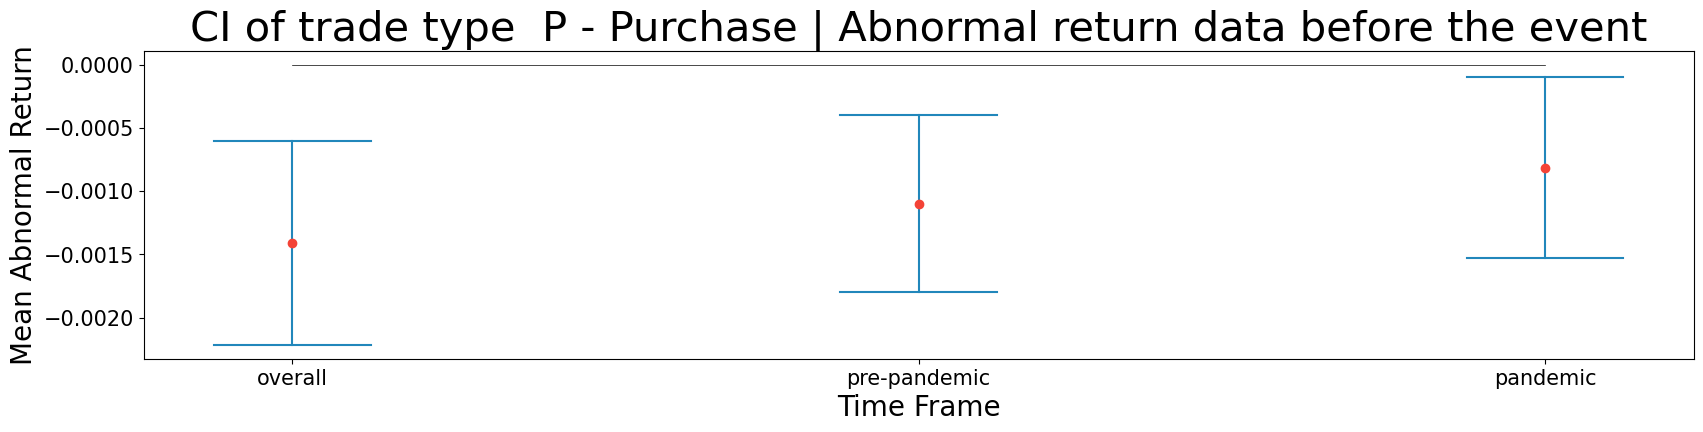

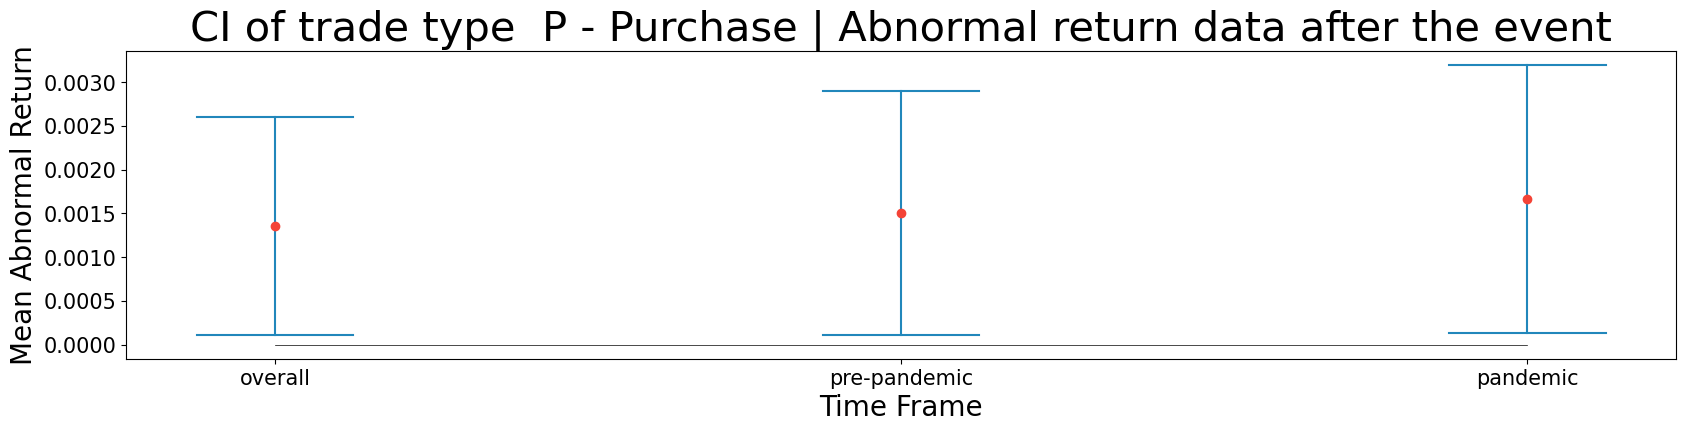

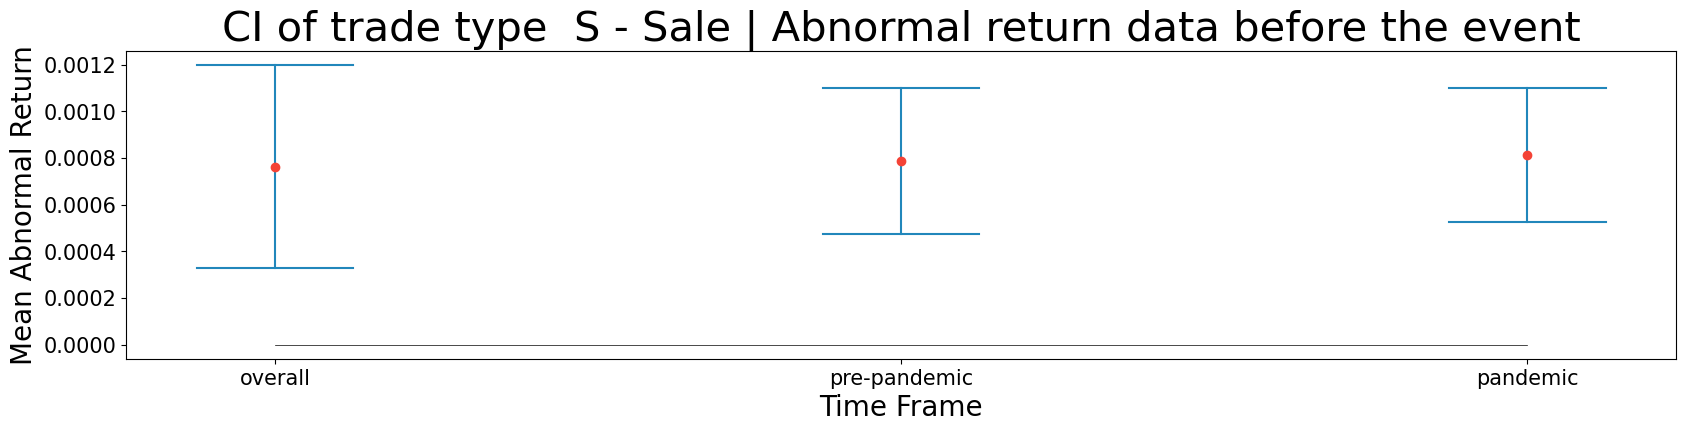

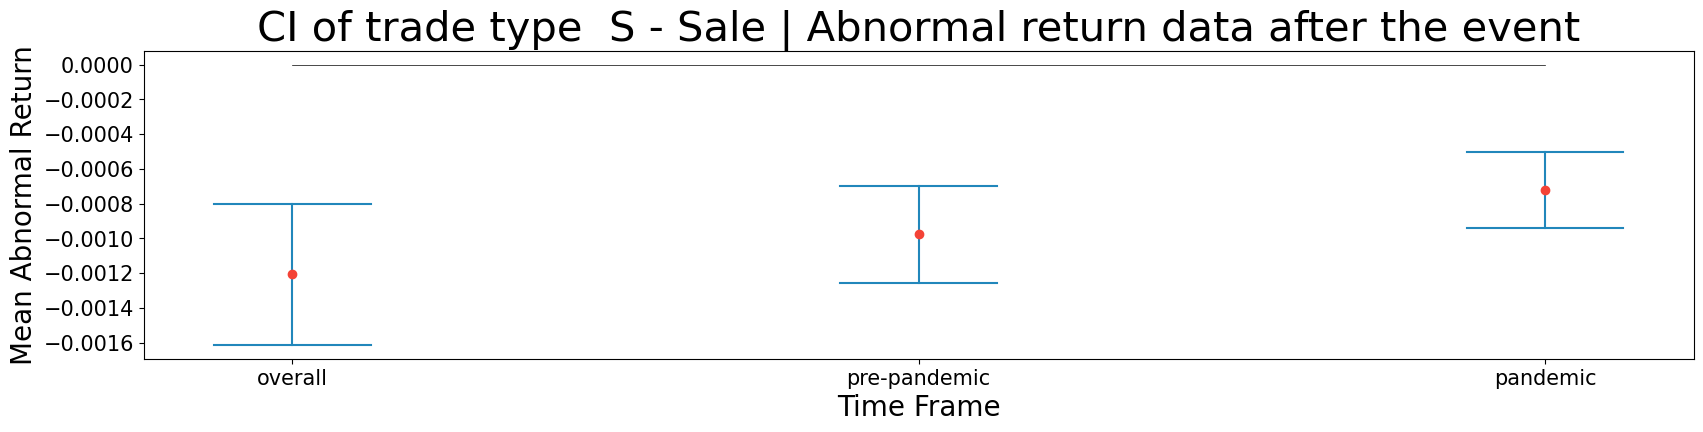

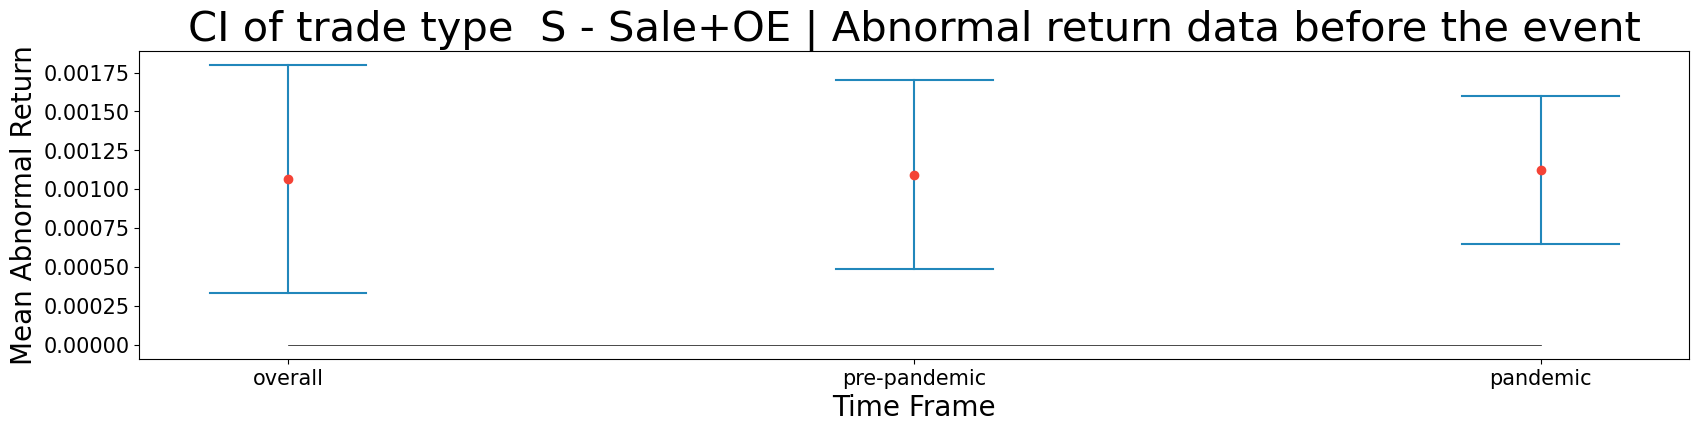

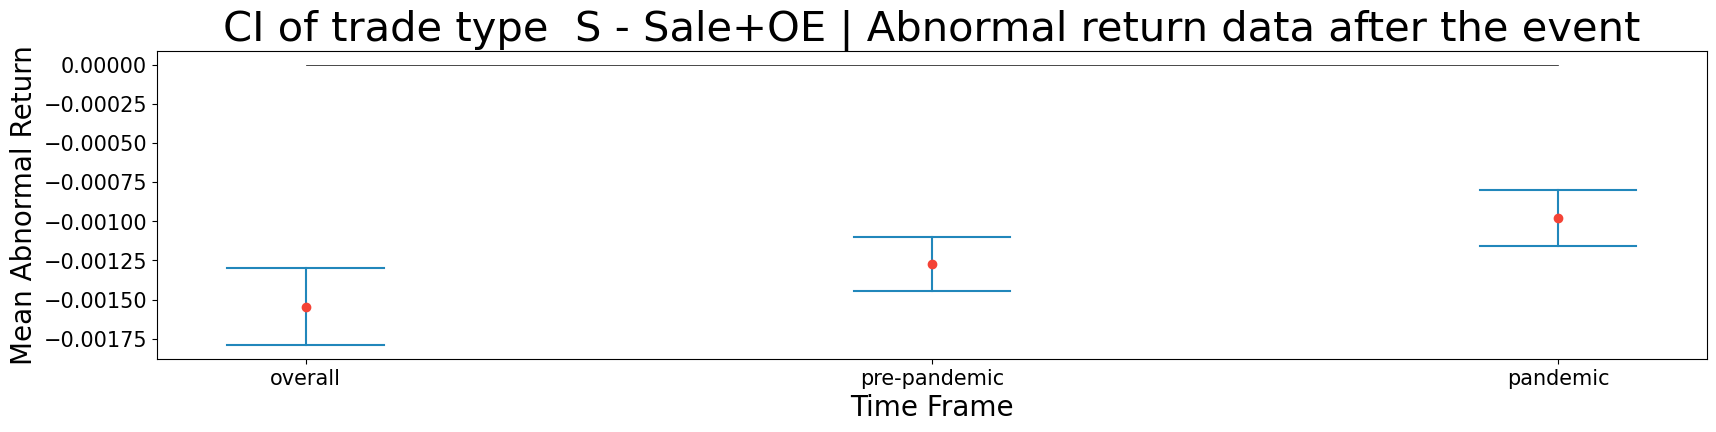

In [23]:
# purcase, sale and sale with oe
for t in types_of_interest:
    for side in event_day_ranges.keys():

        df_ = df_p.loc[t,:,side]

        def plot_confidence_interval(x, mean, CI, color='#2187bb', horizontal_line_width=0.25):


            left = x - horizontal_line_width / 2
            top = mean - CI
            right = x + horizontal_line_width / 2
            bottom = mean + CI
            plt.plot([x, x], [top, bottom], color=color)
            plt.plot([left, right], [top, top], color=color)
            plt.plot([left, right], [bottom, bottom], color=color)
            plt.plot(x, mean, 'o', color='#f44336')

            return mean, CI

        plt.figure(figsize=(fig_height,4))

        df_to_plot = df_
        for i, row in enumerate(df_to_plot.sort_values("mean").itertuples()):
            mean, CI = plot_confidence_interval(i, row[1], row[6][1] - row[1])

        plt.plot(np.zeros(len(df_to_plot)), color="black", linewidth=0.5)
        plt.xticks(range(len(df_to_plot)), df_to_plot.index, fontsize=tick_size)
        plt.yticks(fontsize=tick_size)

        if side == "before":
            side_desc = "before the event"
        else:
            side_desc = "after the event"

        plt.title(f'CI of trade type  {t} | Abnormal return data {side_desc}', fontsize=title_size)

        plt.xlabel('Time Frame', fontsize=label_size)
        plt.ylabel('Mean Abnormal Return', fontsize=label_size)

        plt.xticks(fontsize=tick_size)
        plt.yticks(fontsize=tick_size)
        plt.savefig(f"data/{NAME}/visualisations/CI_{t}_{side}.png", dpi=600, bbox_inches='tight')
        plt.show()

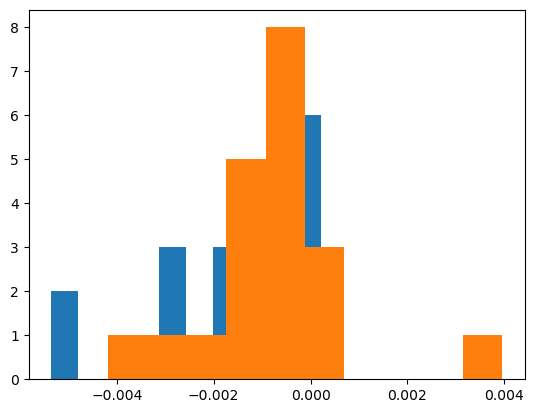

For type P - Purchase, in the days before of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.2515589025


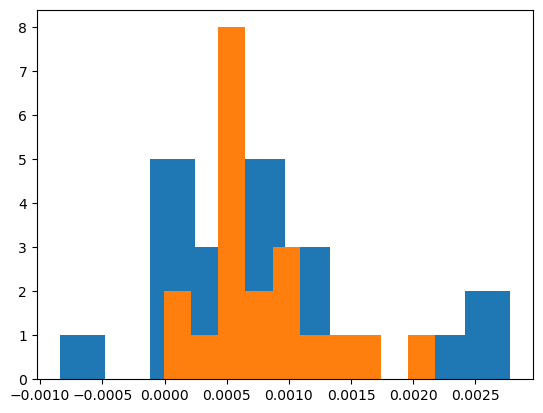

For type S - Sale, in the days before of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.8350269388


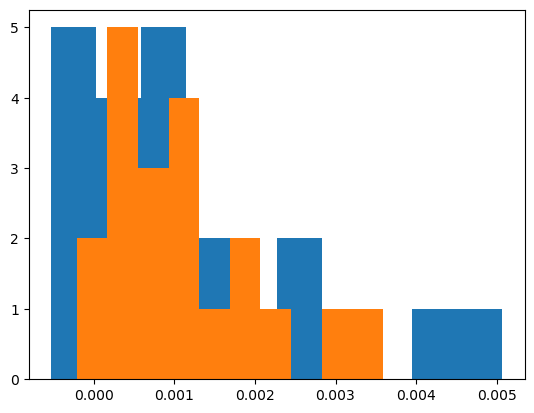

For type S - Sale+OE, in the days before of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.889327986


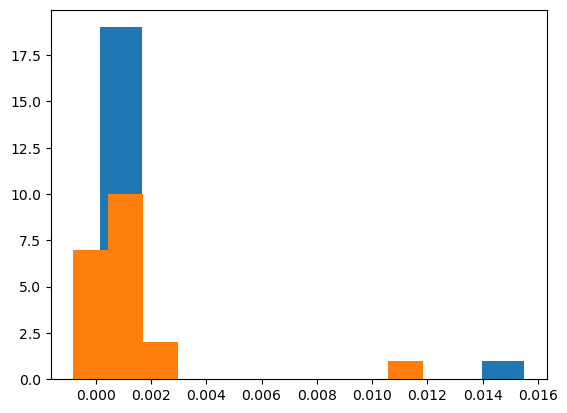

For type P - Purchase, in the days after of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.7397154417


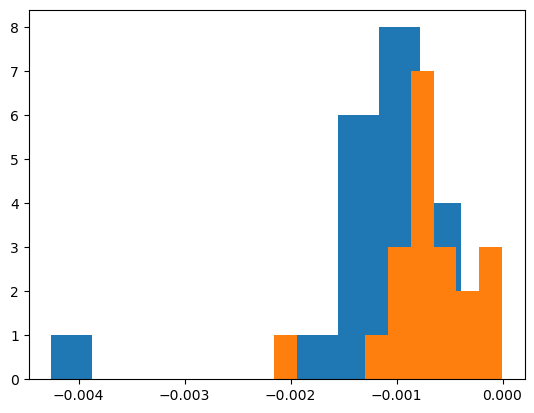

For type S - Sale, in the days after of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.0212142473


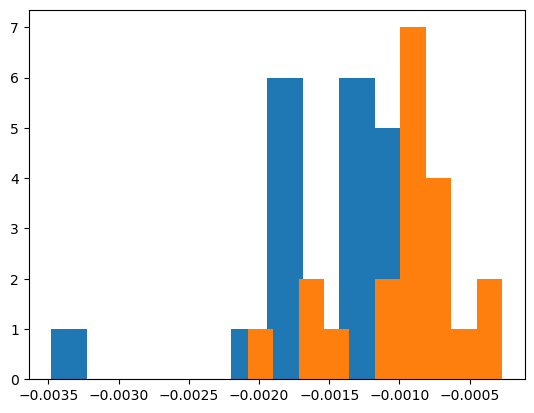

For type S - Sale+OE, in the days after of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of 0.0010944653


In [24]:
time_aggregated = df_abnormal_returns.sum(axis=1)#.transpose()
matrix_data = dict()

for side in event_day_ranges.keys():
    d = {}
    for t in types_of_interest:

        event_day_range = event_day_ranges[side]
        df_abnormal_returns_type = df_abnormal_returns.loc[:,:,t]

        timestamps = df_abnormal_returns_type.index.get_level_values(2)

        df_AR_type_side = df_abnormal_returns_type.iloc[:,event_day_range[0]:event_day_range[1]]


        pand_start, pand_end = investigation_periods["pandemic"][0], investigation_periods["pandemic"][1]
        prepand_start, prepand_end = investigation_periods["pre-pandemic"][0], investigation_periods["pre-pandemic"][1]

        mask_pand = (timestamps >= pand_start) & (timestamps <= pand_end)
        mask_prepand = (timestamps >= prepand_start) & (timestamps <= prepand_end)


        df_AR_type_side_pand_agg = df_AR_type_side[mask_pand].mean(axis=0)
        df_AR_type_side_prepand_agg = df_AR_type_side[mask_prepand].mean(axis=0)
        plt.hist(df_AR_type_side_pand_agg)
        plt.hist(df_AR_type_side_prepand_agg)
        plt.show()

        tt = stats.ttest_ind(a=df_AR_type_side_prepand_agg, b=df_AR_type_side_pand_agg)
        print(f"For type {t}, in the days {side} of the event, the pre-pandemic and pandemic mean of abnormal returns is different with a p-value of {round(tt.pvalue, 10)}")

        d.update({t:tt.pvalue})

    matrix_data[side] = d

### P-values of whether pre-pandemic and pandemic are significantly different for the timeframe before and after the event and different types

In [25]:
print(pd.DataFrame.from_dict(matrix_data).to_latex())

\begin{tabular}{lrr}
\toprule
{} &    before &     after \\
\midrule
P - Purchase &  0.251559 &  0.739715 \\
S - Sale     &  0.835027 &  0.021214 \\
S - Sale+OE  &  0.889328 &  0.001094 \\
\bottomrule
\end{tabular}



C:\Users\waxfa\AppData\Local\Temp\ipykernel_31912\788084193.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame.from_dict(matrix_data).to_latex())


Specify the type of the trades to investigate

### Visualize how active Directors Dealings Are
Should move this to somewhere else
Want visual confirmation that Directors have changed behaviour during the times of Covid (Hypothesis 3)

In [26]:
all_insider_trades = companies[0].insider_data_df.head(0)
from tqdm import tqdm
#for j in tqdm(range(len(companies[:200]))):
for j in tqdm(range(len(companies))):
    all_insider_trades = pd.concat([all_insider_trades, companies[j].insider_data_df])#  @ gunnar very nice asymptotic runtime

100%|██████████| 2886/2886 [06:58<00:00,  6.90it/s]


<AxesSubplot:xlabel='FilingDateTrunc'>

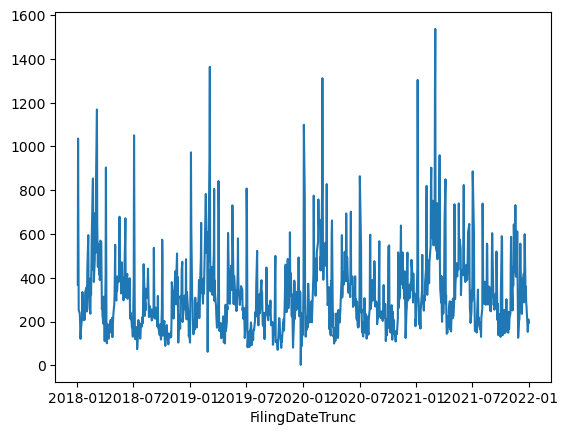

In [27]:
all_insider_trades['FilingDateTrunc'] = all_insider_trades['FilingDate'].dt.date
all_insider_trades.groupby('FilingDateTrunc')['FilingDate'].count().plot()

In [28]:
all_insider_trades.to_csv('AllTradesForExcelGSK.csv')

<AxesSubplot:xlabel='FilingDateTrunc'>

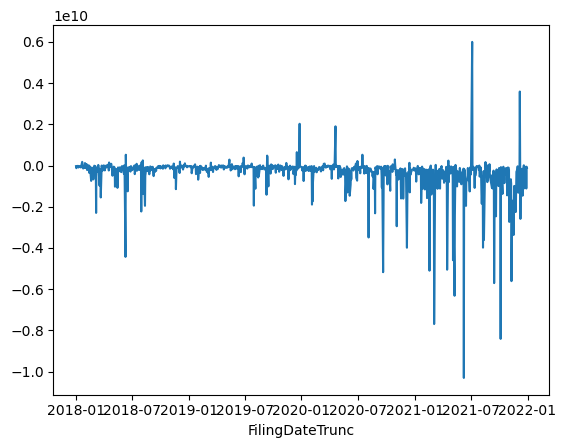

In [29]:
all_insider_trades.groupby('FilingDateTrunc')['Value'].sum().plot()

<AxesSubplot:xlabel='FilingDateTrunc'>

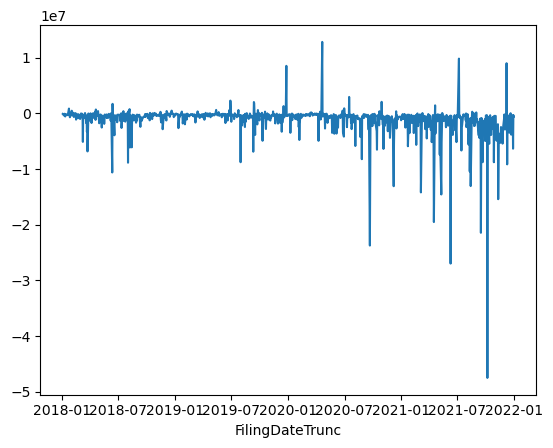

In [30]:
all_insider_trades.groupby('FilingDateTrunc')['Value'].mean().plot()

(array([37831., 26280., 33002., 29427., 24294., 38838., 28814., 41552.,
        37635., 31582.]),
 array([17533. , 17678.8, 17824.6, 17970.4, 18116.2, 18262. , 18407.8,
        18553.6, 18699.4, 18845.2, 18991. ]),
 <BarContainer object of 10 artists>)

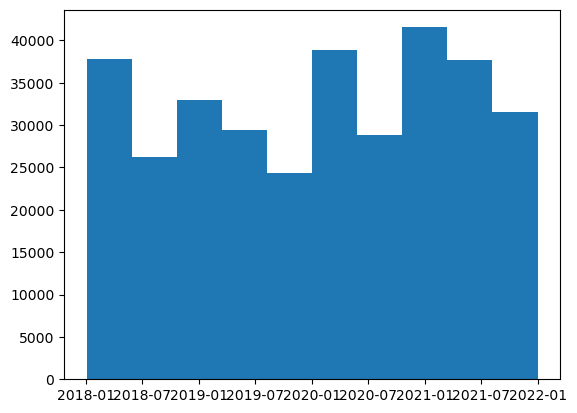

In [31]:
plt.hist(all_insider_trades['FilingDateTrunc'])